# Taking a look at the data and H2O predictions
April 28, 2015

In [3]:
import os
os.chdir('../../../../Downloads/')

In [4]:
h2o_retire3_predictions_file = 'r3a.csv'
import pandas as pd

In [6]:
r3pred=pd.read_csv(h2o_retire3_predictions_file)

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import seaborn as sn

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000019099E48>]], dtype=object)

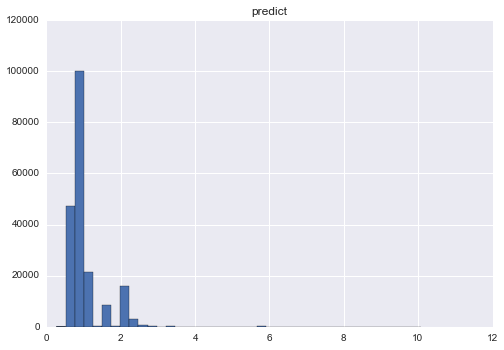

In [10]:
r3pred.hist(bins=40)

In [11]:
os.chdir('../Documents/projects/HRattrition/EDA/')

In [14]:
tmp=pd.read_csv('employee_dataframe7long.tsv',sep='\t',nrows=10000)
col_listing = [52,74,182]
[tmp.columns[c] for c in col_listing]


['EXT_FUNC_ID_SFI', 'FUNC_ID_SFI', 'zip5']

In [15]:
del tmp
empl = pd.read_csv('employee_dataframe7long.tsv',sep='\t',dtype={'EXT_FUNC_ID_SFI':np.str,'FUNC_ID_SFI':np.str,'zip5':np.str})

In [16]:
retire_codes = ['EARLY RETIREMENT',
 'NORMAL RETIREMENT',
 'PART-TIME RETIREE',
 'PART-TIME RETIREE - NO GI',
 'REGULAR RETIREMENT',
 'RET W/ INVOLUNTARY SEVERANCE',
 'RET W/ VOLUNTARY SEVERANCE',
 'RETIREE',
 'WINDOW 0 - EARLY RET INCENTIVE',
 'WINDOW 0 - RET WITH INVOL SEV',
 'WINDOW 1 - EARLY RET INCENTIVE',
 'WINDOW 1 - RET WITH INVOL SEV',
 'WINDOW 2 - EARLY RET INCENTIVE',
 'WINDOW 2 - RET WITH INVOL SEV',
 'WINDOW 3 - EARLY RET INCENTIVE',
 'WINDOW 3 - RET WITH INVOL SEV',
 'WINDOW 4 - EARLY RET INCENTIVE',
 'WINDOW 4 - RET WITH INVOL SEV',
 'WINDOW 5 - EARLY RET INCENTIVE',
 'WINDOW 5 - RET WITH INVOL SEV',
 'WINDOW 6 - EARLY RET INCENTIVE',
 'WINDOW 6 - RET WITH INVOL SEV']

In [25]:
def identify_group_intext_field(x,ret_codes =None):
    try:
        matched = [a for a in x.split(';') if a in ret_codes]
        if len(matched):
            return 1
        else:
            return 0
    except AttributeError:
        return 0 # deal with NaNs

In [19]:
empl['retired'] = empl.ACTRES1.apply(lambda(x): identify_group_intext_field(x,retire_codes))

In [29]:
sum(empl.ACTRES6.apply(lambda(x):identify_group_intext_field(x,retire_codes)))

0

In [20]:
def summarize_dataframe2(df,show_example=False):
    nrow = len(df)
    summary_df = pd.DataFrame(columns = ['Column','datatype','nmissing','arity','accepted values'])
    len_df = len(summary_df)
    for col in df.columns:
        nmiss = nrow - df[col].value_counts().sum()
        narity = len(df[col].unique())
        if show_example:
            print col, df[col].dtype,nmiss, "\t", narity,":\t", df[col].ix[8320]
        else:
            print col, df[col].dtype,nmiss, "\t", narity
        accept_val = None
        if narity < 20:
            accept_val = df[col].unique()
        summary_df.loc[len_df] = [col,df[col].dtype,nmiss,narity,accept_val]
        len_df+=1
    return summary_df

In [76]:
empl[empl.KEY==632891807534216]#['ACTRES1','LOC_STATE','status','COMPANY']

,ACTRES1,ACTRES10,ACTRES2,ACTRES3,ACTRES4,ACTRES5,ACTRES6,ACTRES7,ACTRES8,ACTRES9,...,Tenure_tdelta,status,Tenure_years,zip5,HAVE_INS,HAVE_DEP,COUNT,COMP_FREQ_ANNUAL,sep_status,retired
5951,MISSING,NaN,EMPLOYEE NEW HIRE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"390 days, 00:00:00",0,1.067784,61761,0,NaN,NaN,1,0,0


In [21]:
sdf = summarize_dataframe2(empl)

ACTRES1 object 0 	25528
ACTRES10 object 120394 	12096
ACTRES2 object 0 	22260
ACTRES3 object 56834 	19761
ACTRES4 object 74610 	18075
ACTRES5 object 85633 	14497
ACTRES6 object 93197 	11931
ACTRES7 object 100055 	12926
ACTRES8 object 107740 	11037
ACTRES9 object 113980 	11376
ADDRCNT1 int64 0 	6
ADDRCNT10 int64 0 	15
ADDRCNT3 int64 0 	10
ADDRCNT5 int64 0 	12
ADDRESS1 object 0 	190462
ADDRESS2 object 185764 	7864
ANNUAL_RT float64 0 	123705
Age_tdelta object 0 	19297
Age_years float64 0 	19297
BIRTHDATE object 0 	24349
BOX1 object 70036 	4
BOX10 object 127992 	4
BOX2 object 61874 	4
BOX3 object 78279 	4
BOX4 object 89230 	4
BOX5 object 96888 	4
BOX6 object 103326 	4
BOX7 object 110835 	4
BOX8 object 116670 	4
BOX9 object 122677 	4
COMPANY int64 0 	7
CUR_DEPT_MOS float64 0 	5388
CUR_EFUNC_MOS float64 0 	7917
CUR_FUNC_MOS float64 0 	9046
CUR_GRADE_MOS float64 0 	4876
CUR_JOB_MOS float64 0 	6476
CUR_LOC_MOS float64 0 	7883
DEPTCNT1 int64 0 	8
DEPTCNT10 int64 0 	23
DEPTCNT3 int64 0 	12
DEPT

In [63]:
#sdf[sdf['accepted values']!=None]
sdf[sdf.arity == 4]

,Column,datatype,nmissing,arity,accepted values
20,BOX1,object,70036,4,"[S, nan, H, L]"
21,BOX10,object,127992,4,"[S, nan, H, L]"
22,BOX2,object,61874,4,"[S, nan, L, H]"
23,BOX3,object,78279,4,"[S, nan, H, L]"
24,BOX4,object,89230,4,"[H, nan, S, L]"
25,BOX5,object,96888,4,"[S, nan, H, L]"
26,BOX6,object,103326,4,"[S, nan, H, L]"
27,BOX7,object,110835,4,"[S, nan, H, L]"
28,BOX8,object,116670,4,"[S, nan, H, L]"
29,BOX9,object,122677,4,"[S, nan, H, L]"


In [65]:
pd.crosstab(empl.BOX1,empl.BOX2)

BOX2,H,L,S
BOX1,,,
H,10647,79,8199
L,181,2424,5728
S,8615,2391,70239


### For BOX* replace S with 2, nan with 0, H with 3 L with 1 

In [66]:
box_col_list = [x for x in empl.columns if x.startswith('BOX')]
box_col_list

['BOX1',
 'BOX10',
 'BOX2',
 'BOX3',
 'BOX4',
 'BOX5',
 'BOX6',
 'BOX7',
 'BOX8',
 'BOX9']

In [72]:
## replace nan
empl[box_col_list]=empl[box_col_list].fillna(0).copy()
empl[box_col_list] = empl[box_col_list].replace({'H':3,'S':2,'L':1}).copy()
empl[box_col_list].head()

,BOX1,BOX10,BOX2,BOX3,BOX4,BOX5,BOX6,BOX7,BOX8,BOX9
0,2,2,2,2,3,2,2,2,2,2
1,0,0,0,0,0,0,0,0,0,0
2,0,2,1,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2,2
4,2,0,0,0,0,0,0,0,0,0


In [ ]:
#empl['Missing_dependents']=empl['HAVE_DEP'.isna]

### clean up these columns that are binary

In [45]:
empl.HAVE_INS.fillna(0,inplace=True)
empl.HAVE_INS.value_counts()

0    116286
1     83133
dtype: int64

In [47]:
empl.replace({'SEX':{'M':0,'F':1}},inplace=True)
empl.SEX.value_counts()

1    124760
0     74659
dtype: int64

In [56]:
binary_cols_to_cat = ['FULLPART3','FULLPART5','FULLPART10','PARTFULL3','PARTFULL5','PARTFULL10']
for col in binary_cols_to_cat:
    empl.replace({col:{'N':0,'Y':1}},inplace=True)
empl[col].value_counts()

0    187632
1     11787
dtype: int64

### drop PER_ORG because only one value

In [58]:
empl.drop('PER_ORG',axis=1,inplace=True)

In [61]:
sdf.sort('arity',ascending=False)

,Column,datatype,nmissing,arity,accepted values
90,KEY,int64,0,199419,None
14,ADDRESS1,object,0,190462,None
154,SAL1,float64,0,123705,None
16,ANNUAL_RT,float64,0,123705,None
156,SAL2,float64,0,100054,None
157,SAL3,float64,0,91679,None
158,SAL4,float64,0,84586,None
110,MERIT2,float64,0,81867,None
123,PERF1,float64,0,78699,None
159,SAL5,float64,0,78365,None


## May 11,2015
### Playing around with trying to use a predator-prey model to predict the employee churn.
Lotka-Volterra equations are:
\begin{equation}
\frac{dx}{dt} = \alpha x - \beta x y \\
\frac{dy}{dt} = \delta xy - \gamma y
\end{equation}
where 
$x$ is the number of the prey, $y$ is the number of the predator and the four parameters: $\alpha, \beta,\gamma,\delta$ represent the interactions between these two populations.

* In our case we'll let $x$ be the number of current employees at a time point $t$ and $y$ be the number of separated employees at a time point $t$.

* To preserve ability to aggregate as specifically as I want, I'll create a data frame for each population that has time as an index and the columns are the employees: 1 means present in that population.

* requires creating a mini-dataframe for each employee spanning hire-date to termination-date.

In [79]:
empl.shape

(199419, 188)

In [80]:
empl.ix[0][['HIRE_DT','TERMINATION_DT','status']]

HIRE_DT           1967-09-25
TERMINATION_DT    2004-08-31
status                     1
Name: 0, dtype: object

In [81]:
empl.ix[1][['HIRE_DT','TERMINATION_DT','status']]

HIRE_DT           2014-06-09
TERMINATION_DT    2015-01-01
status                     0
Name: 1, dtype: object

## first attempt make all points prior to hire_date == 0 in both dfs

In [87]:
empl.ix[1].TERMINATION_DT

'2015-01-01'

In [90]:
pd.to_datetime(empl.ix[1].TERMINATION_DT)

Timestamp('2015-01-01 00:00:00')

In [84]:
#define the dataframes
empl.HIRE_DT.min(),empl.TERMINATION_DT.min()

('1933-04-24', '1980-01-31')

In [108]:
def create_empl_ts_df(x):
    last_date = '2015-01-01'
    hire_ts = pd.to_datetime(x[0])
    term_ts = pd.to_datetime(x[1])
    last_ts = pd.to_datetime(last_date)
    #print x[0],x[1],x[2]
    #print term_ts - hire_ts
    my_index = pd.date_range(hire_ts,term_ts,freq='M')
    my_data = np.ones(len(my_index))
    active_df = pd.DataFrame(index=my_index,data=my_data)
    print active_df.shape
    if x[2] == 1: # deal with separated employees
        my_index_2 = pd.date_range(term_ts,last_ts,freq='M')
        #print len(my_index_2)
        my_data_2 = np.ones(len(my_index_2))
        non_active_df = pd.DataFrame(index=my_index_2,data=my_data_2)
        print "\t",non_active_df.shape
        #print last_ts - term_ts
    #elif x[2] == 0: # deal with currently employeed
        
    #return active_df

In [109]:
empl.ix[:10][['HIRE_DT','TERMINATION_DT','status']].apply(lambda x: create_empl_ts_df(x),axis=1)

(444, 1)
	(125, 1)
(7, 1)
(236, 1)
	(211, 1)
(354, 1)
	(119, 1)
(25, 1)
(232, 1)
	(21, 1)
(223, 1)
	(21, 1)
(19, 1)
	(181, 1)
(31, 1)
(16, 1)
	(132, 1)
(107, 1)
	(177, 1)


0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
dtype: object

In [117]:
current1

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1955-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1955-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1955-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1955-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1955-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1956-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1956-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1956-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1956-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1956-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


In [124]:
empl.HIRE_DT.min()

'1933-04-24'

In [223]:
def create_empl_ts_df2(x):
    #non_active_df = pd.DataFrame()
    last_date = '2015-01-01'
    first_date = '1933-03-10'
    hire_ts = pd.to_datetime(x['HIRE_DT'])
    term_ts = pd.to_datetime(x['TERMINATION_DT'])
    last_ts = pd.to_datetime(last_date)
    first_ts = pd.to_datetime(first_date)
    #print x[0],x[1],x[2]
    #print term_ts - hire_ts
    status = x['status']
    ## define an index from hire to termination
    my_index = pd.date_range(hire_ts,term_ts,freq='M')
    my_data = np.ones(len(my_index))
    
    active1 = pd.DataFrame(index=my_index,data=my_data)
    ## create an index from first to hire date
    if hire_ts > first_ts:
        my_initial_index = pd.date_range(first_ts,hire_ts,freq='M')
        active0 = pd.DataFrame(index=my_initial_index[:-1],data=np.zeros(len(my_initial_index)-1))
        active1 = pd.concat([active0,active1],axis=0)
    
    #if status == 1: # deal with separated employees
    if last_ts == term_ts:
        active_df = active1
        non_active_df = pd.DataFrame(index=my_initial_index,data=np.zeros(len(my_initial_index)))
    else:
        my_index_2 = pd.date_range(term_ts,last_ts,freq='M')
            #print len(my_index_2)
        my_data_2 = np.ones(len(my_index_2)-1)
        non_active_df = pd.DataFrame(index=my_index_2[1:],data=my_data_2)
            ## add to active
        active2 = pd.DataFrame(index=my_index_2[1:],data=np.zeros(len(my_index_2)-1))
            #missing = np.zeros(len(my_index_2))
            #active_df[my_index_2]=missing
            #print "\t",non_active_df.shape
        active_df = pd.concat([active1,active2],axis=0)
            #print last_ts - term_ts
    #else:
    #    active_df = active1
    #    non_active_df = pd.DataFrame(index=my_initial_index,data=np.zeros(len(my_initial_index)))
    #elif x[2] == 0: # deal with currently employeed
        
    return active_df,non_active_df

In [139]:
empl.ix[0][['HIRE_DT','TERMINATION_DT','status']]

HIRE_DT           1967-09-25
TERMINATION_DT    2004-08-31
status                     1
Name: 0, dtype: object

In [141]:
aaidx = pd.date_range(pd.to_datetime(empl.ix[0].HIRE_DT),pd.to_datetime(empl.ix[0].TERMINATION_DT),freq='M')
aaidx

<class 'pandas.tseries.index.DatetimeIndex'>
[1967-09-30, ..., 2004-08-31]
Length: 444, Freq: M, Timezone: None

In [142]:
abidx = pd.date_range(pd.to_datetime(empl.ix[0].TERMINATION_DT),pd.to_datetime('2015-01-01'),freq='M')
abidx

<class 'pandas.tseries.index.DatetimeIndex'>
[2004-08-31, ..., 2014-12-31]
Length: 125, Freq: M, Timezone: None

In [224]:
df1lista = []
df2lista = []
for i in xrange(107755,len(empl)):#0,len(empl)):#xrange(2000,3000):#len(empl)):
    if i % 1000 == 0:
        print i 
    df1,df2 = create_empl_ts_df2(empl.ix[i])
    df1lista.append(df1)
    df2lista.append(df2)
    

108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
159000
160000
161000
162000
163000
164000
165000
166000
167000
168000
169000
170000
171000
172000
173000
174000
175000
176000
177000
178000
179000
180000
181000
182000
183000
184000
185000
186000
187000
188000
189000
190000
191000
192000
193000
194000
195000
196000
197000
198000
199000


In [226]:
## now patch this onto the end of the other, previously run version
current1a = pd.concat(df1lista,axis=1)


In [227]:
old1a = pd.concat(df2lista,axis=1)


In [238]:
old1a.to_csv('gone1a.csv')

In [239]:
current1a.to_csv('current1a.csv')

In [240]:
current1.to_csv('current1.csv')

In [233]:
current2 = pd.concat([current1,current1a],axis=1)

MemoryError: 

In [228]:
current2 = pd.concat([current1,current1a],axis=1)
old2 = pd.concat([old1,old1a],axis=1)

MemoryError: 

In [ ]:
current2.sum(axis=1).plot(label='current')
old2.sum(axis=1).plot(label='former')

In [222]:
empl.ix[107754:107755][['HIRE_DT','TERMINATION_DT','status']]

,HIRE_DT,TERMINATION_DT,status
107754,1986-10-06,1997-08-01,1
107755,1933-04-24,1997-12-07,1


In [212]:
current1 = pd.concat(df1list,axis=1)
old1 = pd.concat(df2list,axis=1)
current1.shape, old1.shape

((981, 107755), (981, 107755))

In [192]:
empl.ix[2262:2264][['HIRE_DT','TERMINATION_DT','status']]

,HIRE_DT,TERMINATION_DT,status
2262,1967-12-18,2010-06-30,1
2263,1999-06-07,2005-06-24,1
2264,1974-06-03,2015-01-01,1


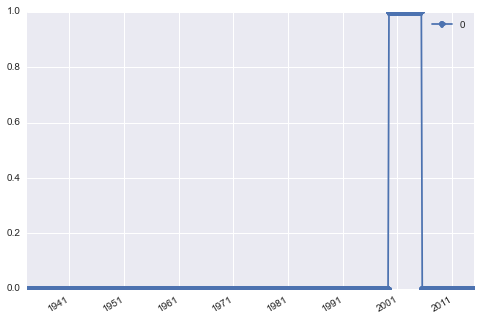

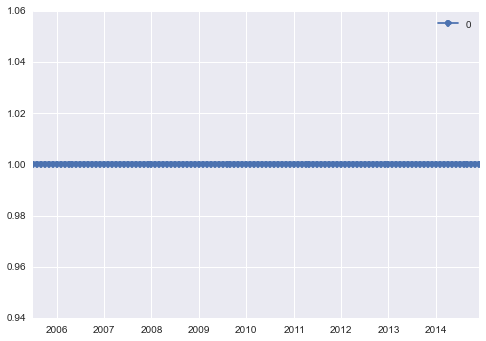

In [203]:
#df1list[-2][df1list[-2]==1]
df1list[-1].plot(marker='o')
df2list[-1].plot(marker='o')

In [204]:
df2list[-1].head()

,0
2005-07-31,1
2005-08-31,1
2005-09-30,1
2005-10-31,1
2005-11-30,1


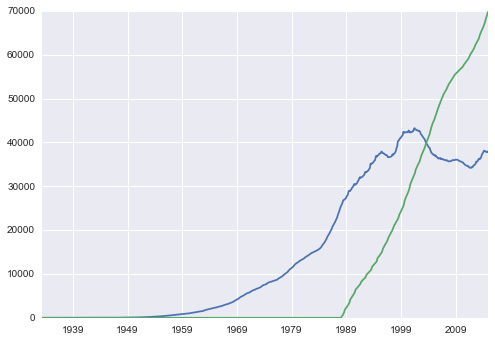

In [213]:
current1.sum(axis=1).plot(label='current')
old1.sum(axis=1).plot(label='former')

In [219]:
delta_y = old1.sum(axis=1).diff()
delta_y.head()

1933-04-30   NaN
1933-05-31     0
1933-06-30     0
1933-07-31     0
1933-08-31     0
Freq: M, dtype: float64

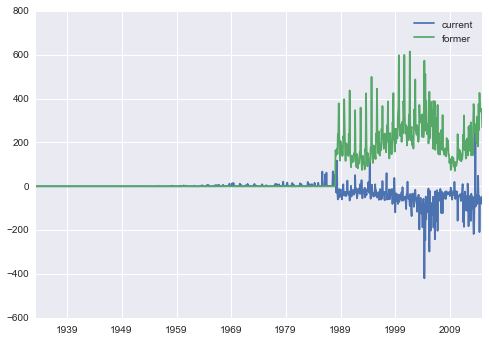

In [220]:
current1.diff().sum(axis=1).plot(label='current')
#old1.diff().sum(axis=1)
delta_y.plot(label='former')
plt.legend()


In [191]:
current1.tail()

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-08-31,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2014-09-30,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2014-10-31,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2014-11-30,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2014-12-31,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
others_to_omit = ['ADDRESS1','Age_tdelta','BIRTHDATE','LAST_HIRE_DT',
                  'LOC_CITY','LOC_TYPE_DESCR_SFI','MAR_STATUS_DT','MAR_STA_SNAME_SFI',
                  'PER_ORG','POSTAL_SFI','SKEY','SERVICE_DT','TERMINATION_DT',
                  'Tenure_tdelta','zip5']#'TOT_MO_SERVICE_SFI','Tenure_months']
                 #'MERIT1','MERIT2','MERIT3','MERIT4','MERIT5','MERIT6','MERIT7','MERIT8','MERIT9','MERIT10',
                 #'PERF1','PERF2','PERF3','PERF4','PERF5','PERF6','PERF7','PERF8','PERF9','PERF10']
history_to_omit = ['ADDRCNT10','ADDRCNT3','ADDRCNT5','DEPTCNT10','DEPTCNT3','DEPTCNT5',
                   'EFUNCCNT10','EFUNCCNT3','EFUNCCNT5','FLOORCNT10','FLOORCNT3','FLOORCNT5',
                  'FTPTCNT10','FTPTCNT3','FTPTCNT5','FULLPART10','FULLPART3','FULLPART5',
                  'FUNCCNT10','FUNCCNT3','FUNCCNT5','GRADECNT10','GRADECNT3','GRADECNT5',
                  'JOBCNT10','JOBCNT3','JOBCNT5','LOCCNT10','LOCCNT3','LOCCNT5','LOCSTCNT10','LOCSTCNT3','LOCSTCNT5',
                  'PARTFULL10','PARTFULL3','PARTFULL5','PTFTCNT10','PTFTCNT3','PTFTCNT5',
                   'SUPVCNT10','SUPVCNT3','SUPVCNT5','ACTRES2','SAL10','SAL9','SAL8','SAL7','SAL6','SAL5','SAL4','SAL3',
                   'SAL2','MERIT2','MERIT3','MERIT4','MERIT5','MERIT6','MERIT7','MERIT8','MERIT9','MERIT10',
                    'PERF2','PERF3','PERF4','PERF5','PERF6','PERF7','PERF8','PERF9','PERF10']
cols_to_categorical = ['COMPANY','COMP_FREQUENCY','DIVISION_CODE_SFI','EEO1CODE','EMPL_CLASS','EMPL_TYPE','ETHNIC_GROUP',
                       'FLSA_STATUS','FULLPART1','FULL_PART_TIME','GRADE','HUBIND','INTERN','JOB_FUNCTION','RELOCATE_ALL_SFI',
                       'REMOTE','REMOTE_SUPV','SEX','SHIFT','SUPV_DIFF_LOC','VOLINVOL','status']